# Dimensionality reduction

In [1]:
%run helper.py

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_swiss_roll, make_s_curve

## S-Curve, Swiss Roll, Mammoth

### S-Curve

In [3]:
n_samples = 1500
S_points, S_color = make_s_curve(n_samples, random_state=0)

sc_df = pd.DataFrame(S_points,columns=["x","y","z"])
sc_df["color"] = S_color

# To standardize the data before performing dimensionality reduction, comment in the following three lines
sc_df.x = StandardScaler().fit_transform(np.array(sc_df.x.values).reshape(-1,1))
sc_df.y = StandardScaler().fit_transform(np.array(sc_df.y.values).reshape(-1,1))
sc_df.z = StandardScaler().fit_transform(np.array(sc_df.z.values).reshape(-1,1))

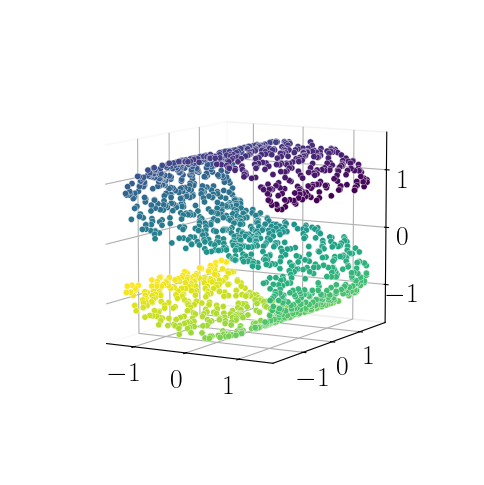

In [4]:
fig = plt.figure(figsize=(6,9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-60, elev=9)
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-1,0,1])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.scatter(sc_df.x, sc_df.y, sc_df.z, c=sc_df.color, s=20, alpha=1, lw=0.25, ec="white")
ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f'get_{a}lim')() for a in 'xyz')], zoom=.75)
plt.savefig("../figures/s-curve_3d.pdf", bbox_inches="tight", transparent=True)

### Swiss Roll

In [5]:
n_samples = 1500
S_points, S_color = make_swiss_roll(n_samples, random_state=0)

In [6]:
sr_df = pd.DataFrame(S_points, columns=["x","y","z"])
sr_df["color"] = S_color
# To standardize the data before performing dimensionality reduction, comment in the following three lines
# sr_df.x = StandardScaler().fit_transform(np.array(sr_df.x.values).reshape(-1,1))
# sr_df.y = StandardScaler().fit_transform(np.array(sr_df.y.values).reshape(-1,1))
# sr_df.z = StandardScaler().fit_transform(np.array(sr_df.z.values).reshape(-1,1))

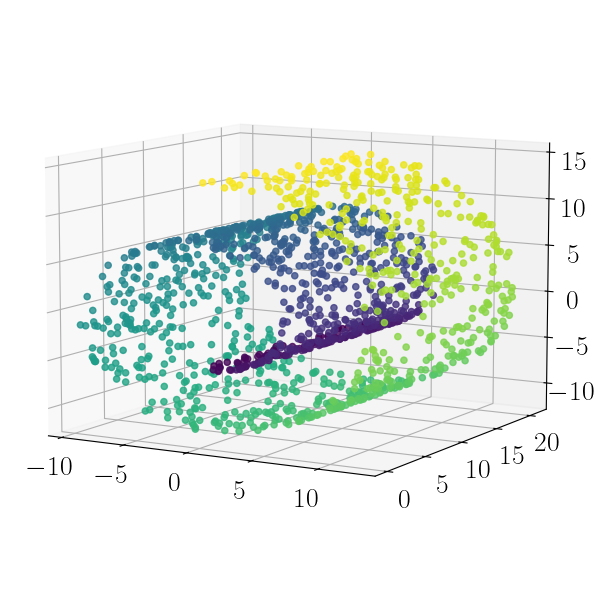

In [7]:
fig, ax = plt.subplots(
        figsize=(6, 6),
        subplot_kw={"projection": "3d"},
    )
ax.view_init(azim=-60, elev=9)
# ax.set_xticks([-1,0,1])
# ax.set_yticks([-1,0,1])
# ax.set_zticks([-1,0,1])
ax.scatter(sr_df.x, sr_df.y, sr_df.z, c=sr_df.color, s=20, alpha=0.8)
plt.tight_layout()
plt.savefig("../figures/swiss-roll_3d.pdf", bbox_inches="tight", transparent=True)

### Mammoth

In [8]:
m_df = pd.read_json("../data/mammoth_3d.json").rename(columns={u:v for u,v in zip(range(3),["x","y","z"])})
m_df["color"] = m_df.x

In [9]:
# To standardize the data before performing dimensionality reduction, comment in the following three lines
# m_df.x = StandardScaler().fit_transform(np.array(m_df.x.values).reshape(-1,1))
# m_df.y = StandardScaler().fit_transform(np.array(m_df.y.values).reshape(-1,1))
# m_df.z = StandardScaler().fit_transform(np.array(m_df.z.values).reshape(-1,1))

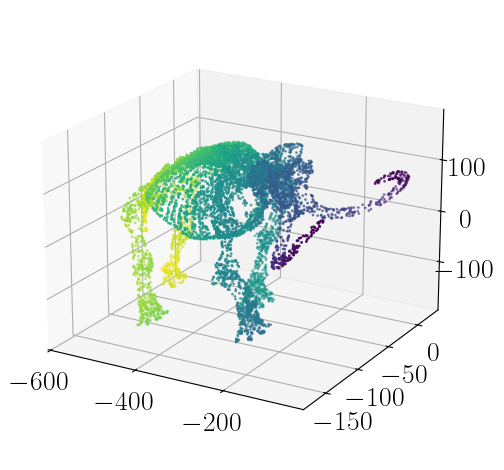

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', )
ax.view_init(elev=20)#, azim=0, roll=0)
ax.scatter(xs=-m_df.x, ys=-m_df.z, zs=m_df.y, s=1, c=m_df.x)
plt.tight_layout()
plt.savefig("../figures/mammoth_3d.pdf", bbox_inches="tight", transparent=True)

### PCA

In [11]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

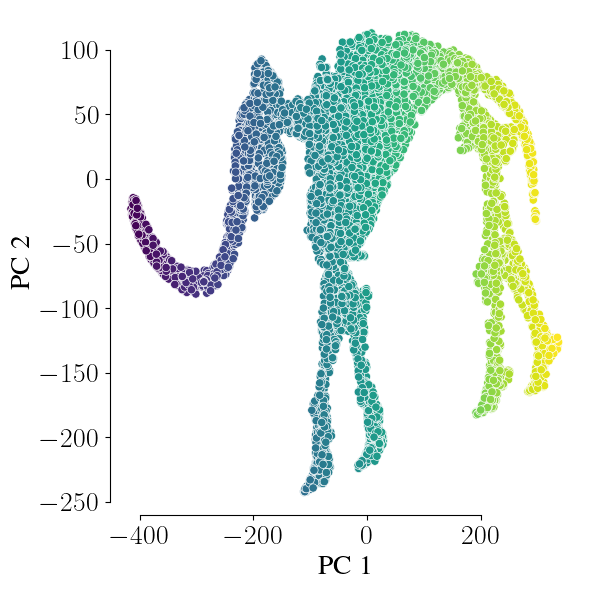

In [12]:
df = m_df

pca = pd.DataFrame(PCA(n_components=2).fit_transform(df.values), columns=["x","y"])
pca["color"] = df.color

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(pca, x="x", y="y", hue="color", palette="viridis", legend=False, ax=ax)
ax.set_xlabel("PC~1")
ax.set_ylabel("PC~2")
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig("../figures/mammoth_pca.pdf", bbox_inches="tight", transparent=True)

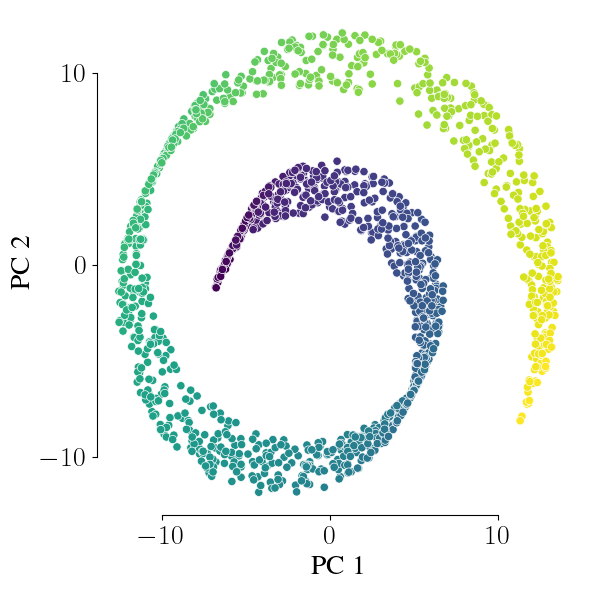

In [13]:
df = sr_df

pca = pd.DataFrame(PCA(n_components=2).fit_transform(df.values), columns=["x","y"])
pca["color"] = df.color

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(pca, x="x", y="y", hue="color", palette="viridis", legend=False, ax=ax)
ax.set_xticks([-10,0,10])
ax.set_yticks([-10,0,10])
ax.set_xlabel("PC~1")
ax.set_ylabel("PC~2")
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig("../figures/swiss-roll_pca.pdf", bbox_inches="tight", transparent=True)

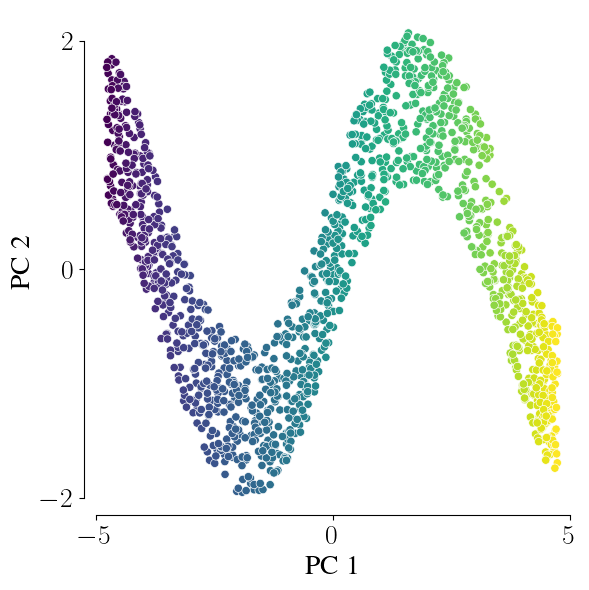

In [14]:
df = sc_df

pca = pd.DataFrame(PCA(n_components=2).fit_transform(df.values), columns=["x","y"])
pca["color"] = df.color

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(pca, x="x", y="y", hue="color", palette="viridis", legend=False, ax=ax)
ax.set_xticks([-5,0,5])
ax.set_yticks([-2,0,2])
ax.set_xlabel("PC~1")
ax.set_ylabel("PC~2")
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig("../figures/s-curve_pca.pdf", bbox_inches="tight", transparent=True)

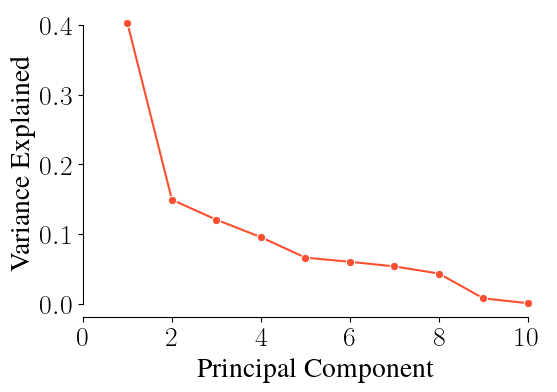

In [15]:
pca_fit = PCA().fit(load_diabetes(as_frame=True)["data"].values).explained_variance_ratio_
fig, ax = plt.subplots(1,1,figsize=(6,4))
sns.lineplot(x=range(1,len((pca_fit))+1), y=pca_fit, marker="o", color=cc.glasbey_hv[1])
ax.set_xticks(range(0,11,2))
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained")
sns.despine(fig, trim=True)
plt.savefig("../figures/diabetes_pca_scree.pdf", bbox_inches="tight", transparent=True)

### MDS 
_NB: MDS is slow._

In [16]:
from sklearn.manifold import MDS

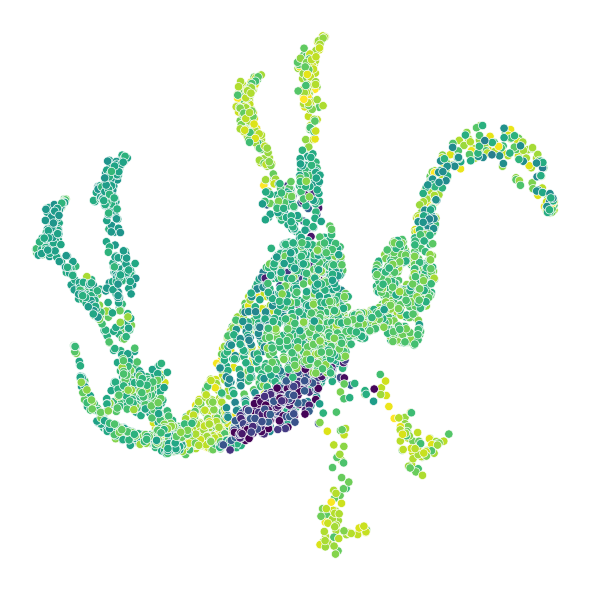

In [17]:
df = m_df

mds = pd.DataFrame(MDS(n_components=2, random_state=42).fit_transform(df[::2].values), columns=["x","y"])
mds["color"] = df.color

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(mds, x="x", y="y", hue="color", palette="viridis", legend=False, ax=ax)
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig("../figures/mammoth_mds.pdf", bbox_inches="tight", transparent=True)

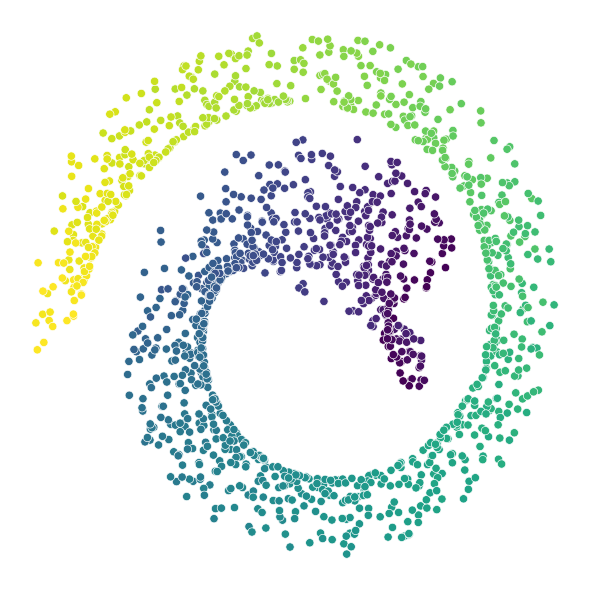

In [18]:
df = sr_df

mds = pd.DataFrame(MDS(n_components=2, random_state=42).fit_transform(df.values), columns=["x","y"])
mds["color"] = df.color

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(mds, x="x", y="y", hue="color", palette="viridis", legend=False, ax=ax)
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig("../figures/swiss-roll_mds.pdf", bbox_inches="tight", transparent=True)

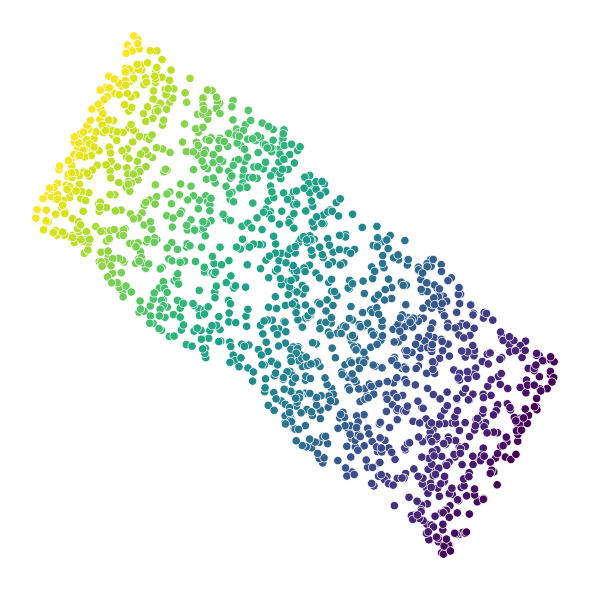

In [19]:
df = sc_df

mds = pd.DataFrame(MDS(n_components=2, random_state=42).fit_transform(df.values), columns=["x","y"])
mds["color"] = df.color

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(mds, x="x", y="y", hue="color", palette="viridis", legend=False, ax=ax)
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig("../figures/s-curve_mds.pdf", bbox_inches="tight", transparent=True)

### t-SNE

In [25]:
from sklearn.manifold import TSNE

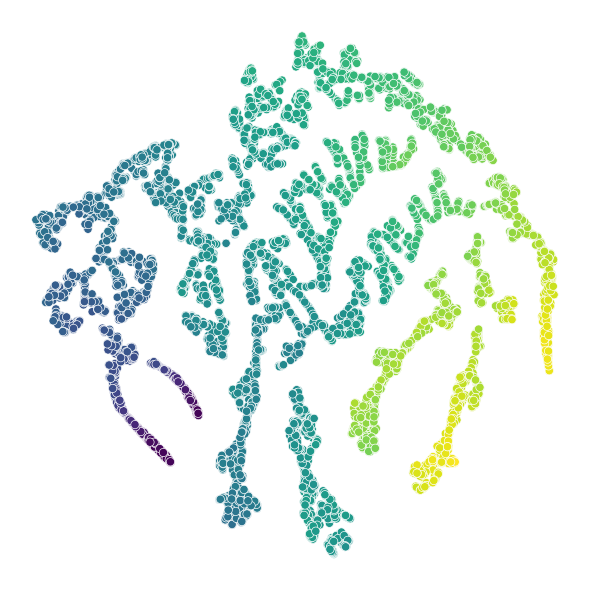

In [26]:
df = m_df

tsne = pd.DataFrame(TSNE(n_components=2, random_state=42, init="pca").fit_transform(df.values), columns=["x","y"])
tsne["color"] = df.color

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(tsne, x="x", y="y", hue="color", palette="viridis", legend=False, ax=ax)
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig("../figures/mammoth_tsne.pdf", bbox_inches="tight", transparent=True)

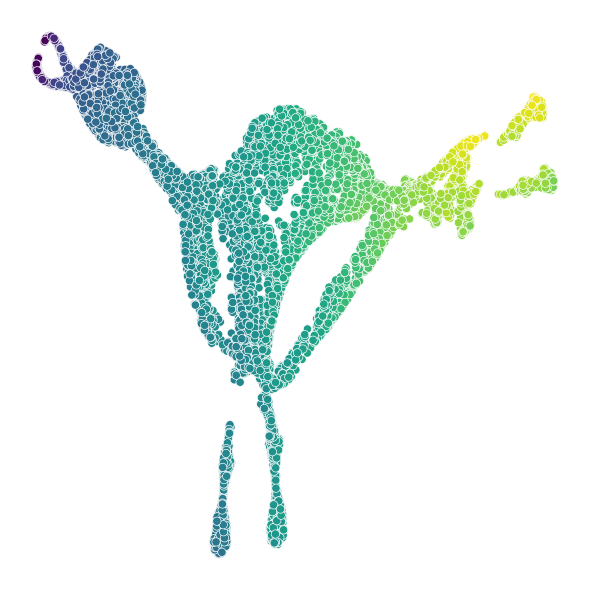

In [27]:
tsne = pd.DataFrame(TSNE(n_components=2, random_state=42, init="pca", perplexity=500).fit_transform(df.values), columns=["x","y"])
tsne["color"] = df.color

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(tsne, x="x", y="y", hue="color", palette="viridis", legend=False, ax=ax)
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig("../figures/mammoth_tsne_p-500.pdf", bbox_inches="tight", transparent=True)

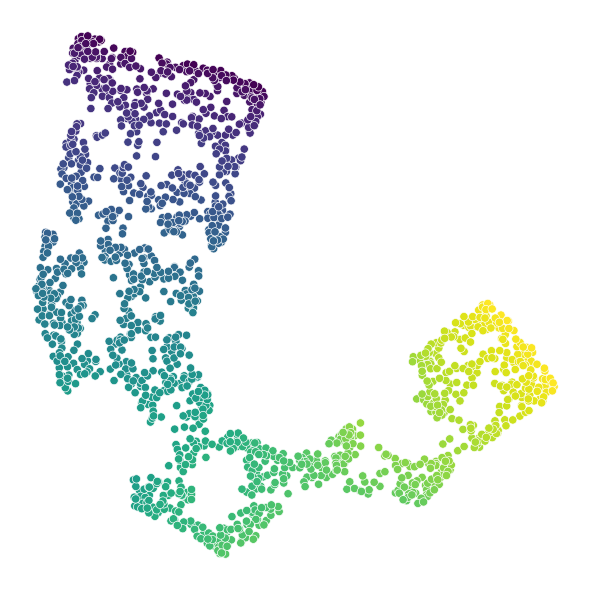

In [28]:
df = sr_df

tsne = pd.DataFrame(TSNE(n_components=2, random_state=42, init="random", perplexity=50).fit_transform(df.values), columns=["x","y"])
tsne["color"] = df.color

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(tsne, x="x", y="y", hue="color", palette="viridis", legend=False, ax=ax)
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig("../figures/swiss-roll_tsne.pdf", bbox_inches="tight", transparent=True)

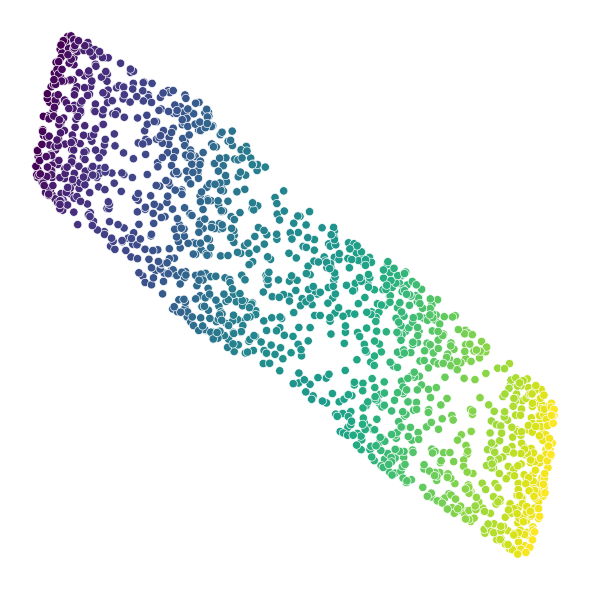

In [29]:
df = sc_df

tsne = pd.DataFrame(TSNE(n_components=2, random_state=42, init="random", perplexity=350).fit_transform(df.values), columns=["x","y"])
tsne["color"] = df.color

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(tsne, x="x", y="y", hue="color", palette="viridis", legend=False, ax=ax)
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig("../figures/s-curve_tsne.pdf", bbox_inches="tight", transparent=True)

### UMAP

We'll skip UMAP here because it requires numba and numba requires an outdated version of numpy. 
Welcome to python packaging hell 🔥.

## Digits

In [30]:
from sklearn.datasets import load_digits

In [31]:
digits = load_digits(as_frame=True)
digits_data = digits["data"]
digits_y = digits["target"]

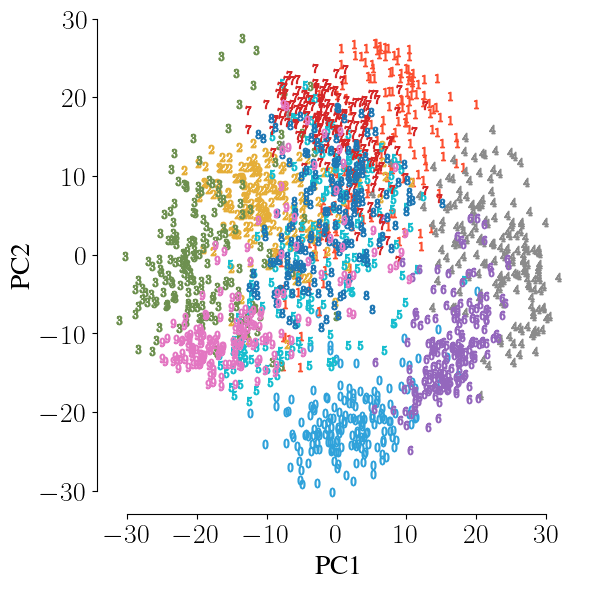

In [32]:
digits_pca = PCA(n_components=2).fit_transform(digits_data)

df = pd.DataFrame(digits_pca, columns=["x","y"])
df["color"] = digits_y

fig, ax = plt.subplots(1,1,figsize=(6,6))
for i in range(10):
    ax.scatter(df.query("color == @i").x, df.query("color == @i").y, marker=rf"${i}$", color=cc.glasbey_hv[i])
# ax.set_axis_off()
ax.set_xticks(np.arange(-30,31,10))
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig("../figures/digits_pca.pdf", bbox_inches="tight", transparent=True)

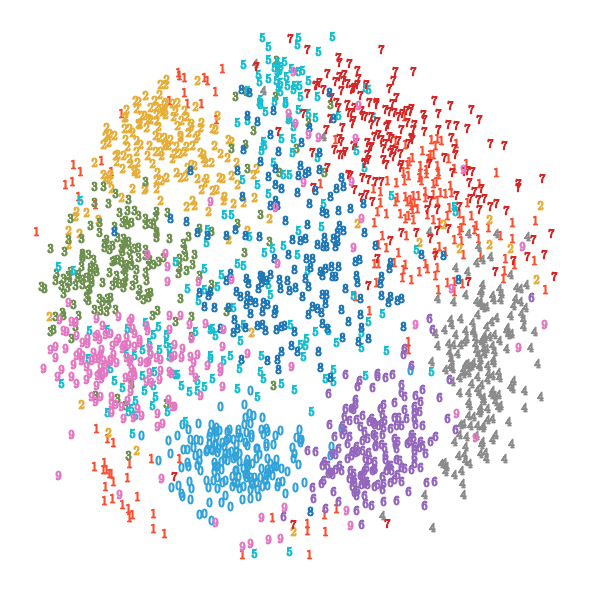

In [33]:
rs = 42
digits_mds = MDS(random_state=rs).fit_transform(digits_data)

df = pd.DataFrame(digits_mds, columns=["x","y"])
df["color"] = digits_y

fig, ax = plt.subplots(1,1,figsize=(6,6))
for i in range(10):
    ax.scatter(df.query("color == @i").x, df.query("color == @i").y, marker=rf"${i}$", color=cc.glasbey_hv[i])
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig(f"../figures/digits_mds_rs{rs}.pdf", bbox_inches="tight", transparent=True)

### t-SNE with different perplexity values and random seeds

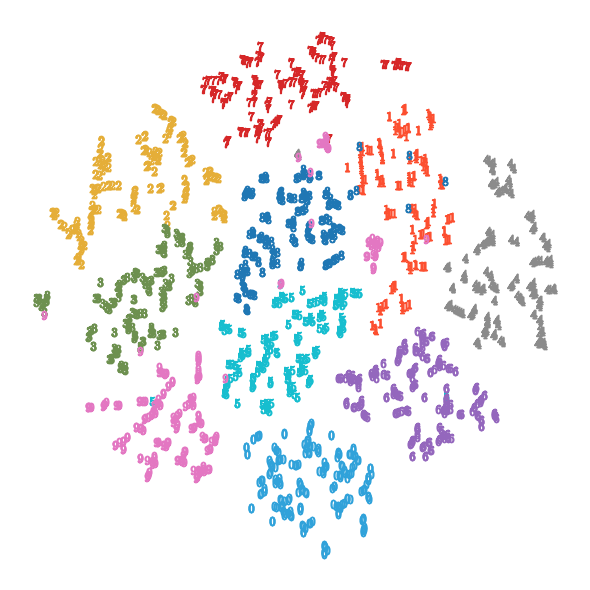

In [34]:
p = 3
digits_tsne = TSNE(perplexity=p, random_state=42).fit_transform(digits_data)

df = pd.DataFrame(digits_tsne, columns=["x","y"])
df["color"] = digits_y

fig, ax = plt.subplots(1,1,figsize=(6,6))
for i in range(10):
    ax.scatter(df.query("color == @i").x, df.query("color == @i").y, marker=rf"${i}$", color=cc.glasbey_hv[i])
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig(f"../figures/digits_tsne_p{p}.pdf", bbox_inches="tight", transparent=True)

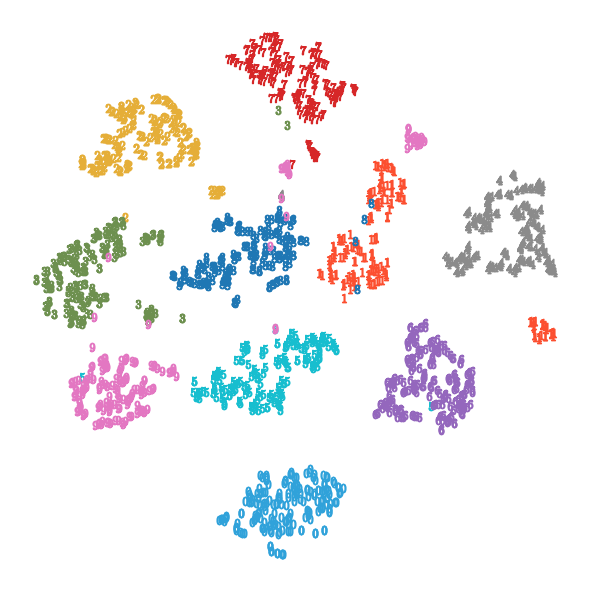

In [35]:
p = 10
digits_tsne = TSNE(perplexity=p, random_state=42).fit_transform(digits_data)

df = pd.DataFrame(digits_tsne, columns=["x","y"])
df["color"] = digits_y

fig, ax = plt.subplots(1,1,figsize=(6,6))
for i in range(10):
    ax.scatter(df.query("color == @i").x, df.query("color == @i").y, marker=rf"${i}$", color=cc.glasbey_hv[i])
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig(f"../figures/digits_tsne_p{p}.pdf", bbox_inches="tight", transparent=True)

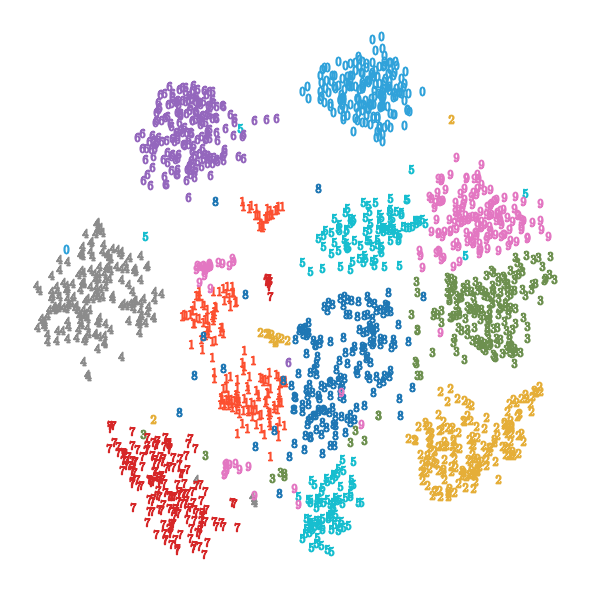

In [36]:
p = 300
r = 0
digits_tsne = TSNE(perplexity=p, random_state=r).fit_transform(digits_data)

df = pd.DataFrame(digits_tsne, columns=["x","y"])
df["color"] = digits_y

fig, ax = plt.subplots(1,1,figsize=(6,6))
for i in range(10):
    ax.scatter(df.query("color == @i").x, df.query("color == @i").y, marker=rf"${i}$", color=cc.glasbey_hv[i])
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig(f"../figures/digits_tsne_p{p}_r{r}.pdf", bbox_inches="tight", transparent=True)

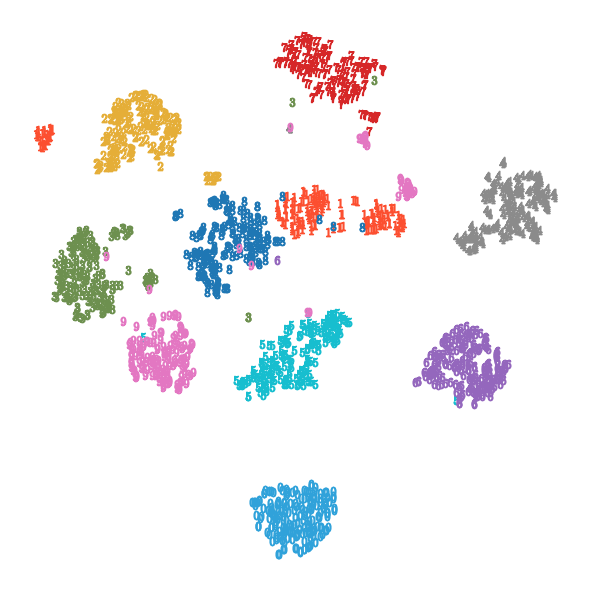

In [37]:
p = 30
digits_tsne = TSNE(perplexity=p, random_state=42).fit_transform(digits_data)

df = pd.DataFrame(digits_tsne, columns=["x","y"])
df["color"] = digits_y

fig, ax = plt.subplots(1,1,figsize=(6,6))
for i in range(10):
    ax.scatter(df.query("color == @i").x, df.query("color == @i").y, marker=rf"${i}$", color=cc.glasbey_hv[i])
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig(f"../figures/digits_tsne_p{p}.pdf", bbox_inches="tight", transparent=True)

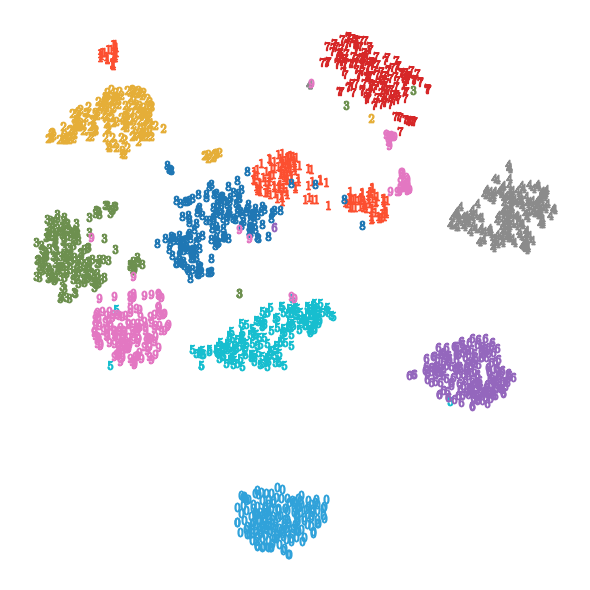

In [38]:
p = 60
digits_tsne = TSNE(perplexity=p, random_state=42).fit_transform(digits_data)

df = pd.DataFrame(digits_tsne, columns=["x","y"])
df["color"] = digits_y

fig, ax = plt.subplots(1,1,figsize=(6,6))
for i in range(10):
    ax.scatter(df.query("color == @i").x, df.query("color == @i").y, marker=rf"${i}$", color=cc.glasbey_hv[i])
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig(f"../figures/digits_tsne_p{p}.pdf", bbox_inches="tight", transparent=True)

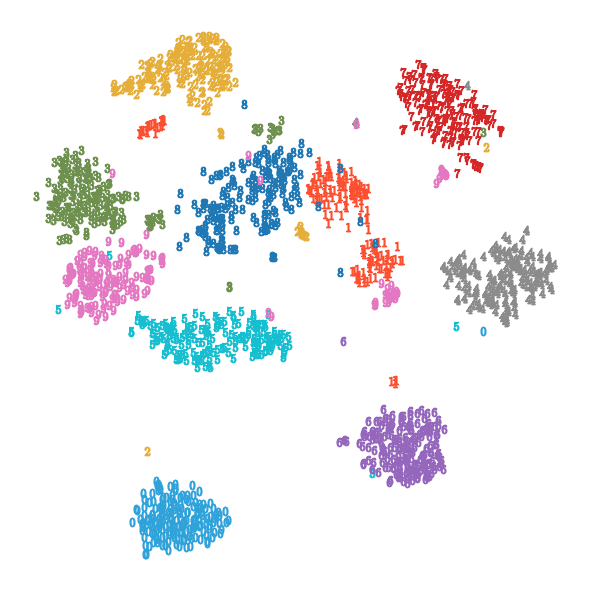

In [39]:
p = 100
digits_tsne = TSNE(perplexity=p, random_state=42).fit_transform(digits_data)

df = pd.DataFrame(digits_tsne, columns=["x","y"])
df["color"] = digits_y

fig, ax = plt.subplots(1,1,figsize=(6,6))
for i in range(10):
    ax.scatter(df.query("color == @i").x, df.query("color == @i").y, marker=rf"${i}$", color=cc.glasbey_hv[i])
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig(f"../figures/digits_tsne_p{p}.pdf", bbox_inches="tight", transparent=True)

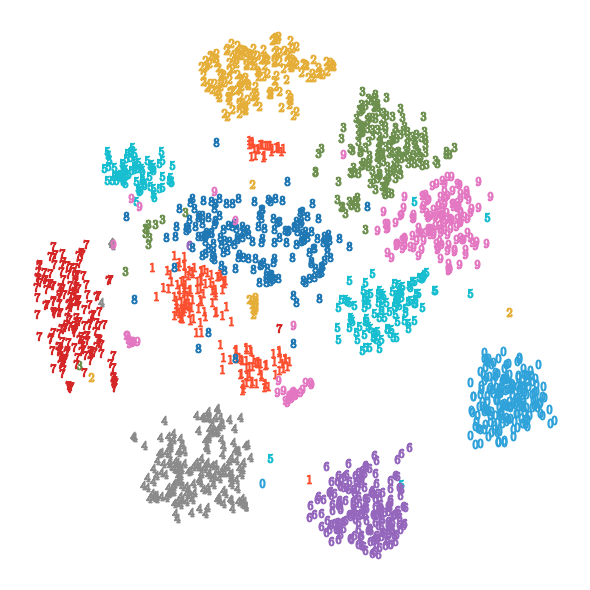

In [40]:
p = 200
digits_tsne = TSNE(perplexity=p, random_state=42).fit_transform(digits_data)

df = pd.DataFrame(digits_tsne, columns=["x","y"])
df["color"] = digits_y

fig, ax = plt.subplots(1,1,figsize=(6,6))
for i in range(10):
    ax.scatter(df.query("color == @i").x, df.query("color == @i").y, marker=rf"${i}$", color=cc.glasbey_hv[i])
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig(f"../figures/digits_tsne_p{p}.pdf", bbox_inches="tight", transparent=True)

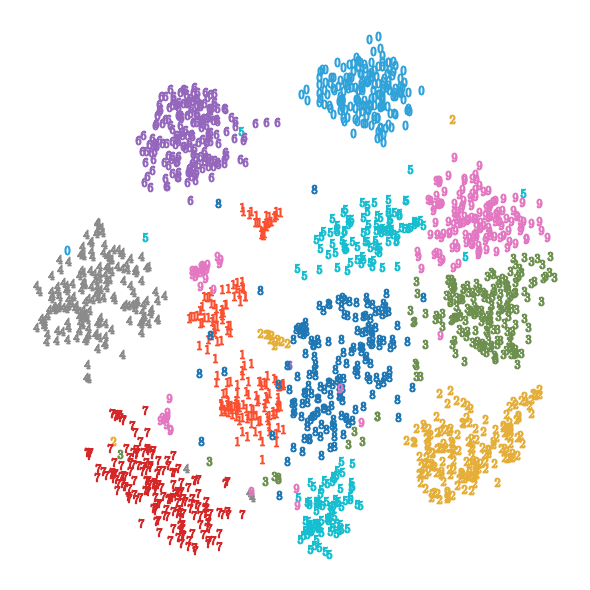

In [41]:
p = 300
digits_tsne = TSNE(perplexity=p, random_state=42).fit_transform(digits_data)

df = pd.DataFrame(digits_tsne, columns=["x","y"])
df["color"] = digits_y

fig, ax = plt.subplots(1,1,figsize=(6,6))
for i in range(10):
    ax.scatter(df.query("color == @i").x, df.query("color == @i").y, marker=rf"${i}$", color=cc.glasbey_hv[i])
ax.set_axis_off()
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig(f"../figures/digits_tsne_p{p}.pdf", bbox_inches="tight", transparent=True)